In [2]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
sns.set_style("white")
from windrose import WindroseAxes

In [3]:
Data = pd.read_csv('la-haute-borne-data-2013-2016.csv', delimiter = ';')
Basic_Data_drop_Sort = pd.read_csv('Basic_Data_drop_Sort.csv', delimiter = ',')

In [4]:
Basic_Data_drop_Sort.head()

,Wind_turbine_name,Date_time,Wa_avg,Ws_avg,P_avg,Rs_avg
0,R80736,2012-12-31 23:00:00,286.19,7.64,801.22998,16.950001
1,R80790,2012-12-31 23:00:00,175.05,8.56,1091.81990,17.180000
2,R80711,2012-12-31 23:00:00,165.25,8.96,1072.65000,17.180000
3,R80721,2012-12-31 23:00:00,163.16,7.25,679.69000,16.360001
4,R80790,2012-12-31 23:10:00,178.00,8.91,1113.45000,17.180000


In [91]:
#
# We have to process our data to make it fit with normal usage i.e. obey the cutin speed of 3.5 ms^-1
#
Basic_Data_drop_Sort = Basic_Data_drop_Sort[Basic_Data_drop_Sort.Ws_avg > 3.5] # cutin speed from manual
Basic_Data_drop_Sort = Basic_Data_drop_Sort[Basic_Data_drop_Sort.Ws_avg < 25] # cut out speed from manual
Basic_Data_drop_Sort = Basic_Data_drop_Sort[Basic_Data_drop_Sort.P_avg < 2050] # nominal power vaule (max safe)
Basic_Data_drop_Sort = Basic_Data_drop_Sort[Basic_Data_drop_Sort.P_avg > 0] # -ve power is pointless



Basic_Data_drop_Sort_R80711 = Basic_Data_drop_Sort[Basic_Data_drop_Sort.Wind_turbine_name == 'R80711']
Basic_Data_drop_Sort_R80721 = Basic_Data_drop_Sort[Basic_Data_drop_Sort.Wind_turbine_name == 'R80721']
Basic_Data_drop_Sort_R80736 = Basic_Data_drop_Sort[Basic_Data_drop_Sort.Wind_turbine_name == 'R80736']
Basic_Data_drop_Sort_R80790 = Basic_Data_drop_Sort[Basic_Data_drop_Sort.Wind_turbine_name == 'R80790']

lenR80711 = len(Basic_Data_drop_Sort_R80711)
lenR80721 = len(Basic_Data_drop_Sort_R80721)
lenR80736 = len(Basic_Data_drop_Sort_R80736)
lenR80790 = len(Basic_Data_drop_Sort_R80790)

# Due to the drawbacks with grouped data we create the ungrouped data for each turbine
Basic_Data_drop_Group = Basic_Data_drop_Sort.groupby('Wind_turbine_name')

Basic_Data_drop_Group.Rs_avg.describe()

# Ws_avg = average wind speed (m/s)
# Wa_avg = average wind direction (deg)
# P_avg  = average power output (kW)
# Rs_avg = average rotor speed (RPM)
# Data is scrambled by default so needs to be sorted for a better plot

,count,mean,std,min,25%,50%,75%,max
Wind_turbine_name,,,,,,,,
R80711,168148.0,13.334495,2.987786,0.37,10.66,13.41,16.370001,17.219999
R80721,160267.0,12.832210,2.898242,0.80,10.28,12.62,15.490000,17.219999
R80736,160701.0,12.970301,2.950856,0.41,10.33,12.78,15.830000,17.219999
R80790,136505.0,13.148870,2.970432,0.58,10.49,13.04,16.120001,17.209999


In [94]:
len(Basic_Data_drop_Sort[Basic_Data_drop_Sort.Rs_avg < 8.5]) # from manual the minimum 

11278

In [112]:
Basic_Data_drop_Sort_R80711 = Basic_Data_drop_Sort_R80711.reset_index()[['Wind_turbine_name','Date_time','Wa_avg' ,'Ws_avg','P_avg', 'Rs_avg']]
Basic_Data_drop_Sort_R80711.head()

,Wind_turbine_name,Date_time,Wa_avg,Ws_avg,P_avg,Rs_avg
0,R80711,2012-12-31 23:00:00,165.25000,8.960000,1072.6500,17.18
1,R80711,2012-12-31 23:10:00,168.28999,8.890000,1061.4301,17.17
2,R80711,2012-12-31 23:20:00,170.08000,9.190000,1144.7900,17.18
3,R80711,2012-12-31 23:30:00,175.33000,8.920000,1183.9800,17.18
4,R80711,2012-12-31 23:40:00,173.07001,9.479999,1317.5500,17.18


In [113]:
Basic_Data_drop_Sort_R80721 = Basic_Data_drop_Sort_R80721.reset_index()[['Wind_turbine_name','Date_time','Wa_avg' ,'Ws_avg','P_avg', 'Rs_avg']]
Basic_Data_drop_Sort_R80721.head()

,Wind_turbine_name,Date_time,Wa_avg,Ws_avg,P_avg,Rs_avg
0,R80721,2012-12-31 23:00:00,163.16,7.25,679.69000,16.360001
1,R80721,2012-12-31 23:10:00,162.42,7.77,867.40997,17.000000
2,R80721,2012-12-31 23:20:00,165.98,8.01,948.92999,17.120001
3,R80721,2012-12-31 23:30:00,168.03,8.61,1099.06010,17.170000
4,R80721,2012-12-31 23:40:00,171.48,8.55,1003.62000,17.090000


In [114]:
Basic_Data_drop_Sort_R80736 = Basic_Data_drop_Sort_R80736.reset_index()[['Wind_turbine_name','Date_time','Wa_avg' ,'Ws_avg','P_avg', 'Rs_avg']]
Basic_Data_drop_Sort_R80736.head()

,Wind_turbine_name,Date_time,Wa_avg,Ws_avg,P_avg,Rs_avg
0,R80736,2012-12-31 23:00:00,286.19000,7.64,801.22998,16.950001
1,R80736,2012-12-31 23:10:00,288.32999,8.31,943.16998,17.139999
2,R80736,2012-12-31 23:20:00,293.04001,8.47,998.48999,17.150000
3,R80736,2012-12-31 23:30:00,294.01999,8.06,837.96002,16.910000
4,R80736,2012-12-31 23:40:00,299.22000,8.03,871.57001,16.920000


In [115]:
Basic_Data_drop_Sort_R80790 = Basic_Data_drop_Sort_R80790.reset_index()[['Wind_turbine_name','Date_time','Wa_avg' ,'Ws_avg','P_avg', 'Rs_avg']]
Basic_Data_drop_Sort_R80790.head()

,Wind_turbine_name,Date_time,Wa_avg,Ws_avg,P_avg,Rs_avg
0,R80790,2012-12-31 23:00:00,175.05000,8.56,1091.8199,17.18
1,R80790,2012-12-31 23:10:00,178.00000,8.91,1113.4500,17.18
2,R80790,2012-12-31 23:20:00,179.69000,9.08,1147.5400,17.18
3,R80790,2012-12-31 23:30:00,181.39999,9.29,1181.0601,17.17
4,R80790,2012-12-31 23:40:00,185.14000,9.06,1082.5601,17.17


In [116]:
Basic_Data_drop_Sort = Basic_Data_drop_Sort.reset_index()[['Wind_turbine_name','Date_time','Wa_avg' ,'Ws_avg','P_avg', 'Rs_avg']]
Basic_Data_drop_Sort.head()

,Wind_turbine_name,Date_time,Wa_avg,Ws_avg,P_avg,Rs_avg
0,R80736,2012-12-31 23:00:00,286.19,7.64,801.22998,16.950001
1,R80790,2012-12-31 23:00:00,175.05,8.56,1091.81990,17.180000
2,R80711,2012-12-31 23:00:00,165.25,8.96,1072.65000,17.180000
3,R80721,2012-12-31 23:00:00,163.16,7.25,679.69000,16.360001
4,R80790,2012-12-31 23:10:00,178.00,8.91,1113.45000,17.180000


<Figure size 1600x1600 with 0 Axes>

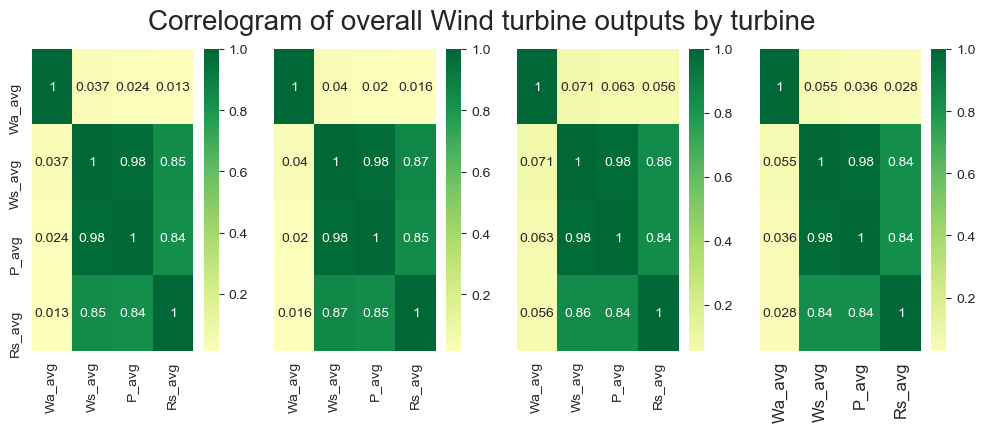

<Figure size 432x288 with 0 Axes>

In [14]:
# Plot
plt.figure(figsize=(20,20), dpi= 80)
fig, axes = plt.subplots(1, 4, figsize=(12, 4), sharey=True, dpi=100)
sns.heatmap(Basic_Data_drop_Sort_R80711.corr(), xticklabels=Basic_Data_drop_Sort_R80711.corr().columns,
            yticklabels=Basic_Data_drop_Sort_R80711.corr().columns, cmap='RdYlGn', center=0, annot=True, ax = axes[0])
sns.heatmap(Basic_Data_drop_Sort_R80721.corr(), xticklabels=Basic_Data_drop_Sort_R80721.corr().columns,
            yticklabels=Basic_Data_drop_Sort_R80721.corr().columns, cmap='RdYlGn', center=0, annot=True, ax = axes[1])
sns.heatmap(Basic_Data_drop_Sort_R80736.corr(), xticklabels=Basic_Data_drop_Sort_R80736.corr().columns, label = 'R80736', 
            yticklabels=Basic_Data_drop_Sort_R80736.corr().columns, cmap='RdYlGn', center=0, annot=True, ax = axes[2])
sns.heatmap(Basic_Data_drop_Sort_R80790.corr(), xticklabels=Basic_Data_drop_Sort_R80790.corr().columns,
            yticklabels=Basic_Data_drop_Sort_R80790.corr().columns, cmap='RdYlGn', center=0, annot=True, ax = axes[3])

# Decorations
plt.suptitle('Correlogram of overall Wind turbine outputs by turbine', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
plt.savefig('Correlogram of overall Wind turbine outputs by turbine.pdf')

In [15]:
Basic_Data_drop_Group.cov()

P_avg       Rs_avg       Wa_avg      Ws_avg
Wind_turbine_name                                                            
R80711            P_avg   205439.180756  1138.282567  1011.311501  874.650470
                  Rs_avg    1138.282567     8.926862     3.530154    4.998613
                  Wa_avg    1011.311501     3.530154  8781.464643    6.826404
                  Ws_avg     874.650470     4.998613     6.826404    3.894890
R80721            P_avg   161158.112720   988.621754   758.658891  695.416882
                  Rs_avg     988.621754     8.399806     4.224972    4.452016
                  Wa_avg     758.658891     4.224972  8741.580064    6.677864
                  Ws_avg     695.416882     4.452016     6.677864    3.137568
R80736            P_avg   193528.945936  1092.483838  2577.214589  824.329924
                  Rs_avg    1092.483838     8.707552    15.431644    4.846815
                  Wa_avg    2577.214589    15.431644  8680.246848   12.666470
                  Ws_avg     824.329924     4.846815    12.666470    3.666351
R80790            P_avg   200325.500070  1121.176377  1466.762370  876.493085
                  Rs_avg    1121.176377     8.823465     7.604184    4.988868
                  Wa_avg    1466.762370     7.604184  8397.216155   10.171009
                  Ws_avg     876.493085     4.988868    10.171009    4.011066

In [16]:
print('Number of data points per turbine: ' +
      str(lenR80711) + ', ' + str(lenR80721) + ', ' + str(lenR80736) + ', ' + str(lenR80790))
# something must be wrong with 90 loosing almost 24 thou more than the others

Number of data points per turbine: 168148, 160267, 160701, 136505


In [117]:
A = 5281
D = 82
Basic_Data_drop_Sort.P_avg[1]
rho = 1.0898 #calculated using online calculator https://www.engineersedge.com/calculators/air-density.htm
Basic_Data_drop_Sort.Rs_avg[1] 
C_p = [] 
#
#P_avg = 1/2 * rho * A * Rs_avg^3 * C_p
#C_p = 2000* P_avg/rho* A * Ws_avg^3  due to P_avg being measured in kW
#C_p is not constant but relates to tip speed ratio =  (Rs_avg*pi*D / 60)/ Ws_avg
# the usual way to display this is by plotting c_p against tip ratio lambda

In [18]:
Basic_Data_drop_Sort_R80721.loc[2, 'P_avg']

948.9299900000001

In [152]:
C_d = []

for i in range(len(Basic_Data_drop_Sort_R80711)):
    Cp = (2000*Basic_Data_drop_Sort_R80711.loc[i, 'P_avg']/(rho*A*(Basic_Data_drop_Sort_R80711.loc[i,'Ws_avg']**3)))
    C_d.append(Cp)
Power_Conversion_R80711 = np.asarray(C_d)
Power_Conversion_R80711

array([0.51820432, 0.5249925 , 0.51256196, ..., 0.12560826, 0.22860994,
       0.29540465])

In [153]:
C_e = []

for i in range(len(Basic_Data_drop_Sort_R80721)):
    Cp = (2000*Basic_Data_drop_Sort_R80721.loc[i, 'P_avg']/(rho*A*(Basic_Data_drop_Sort_R80721.loc[i,'Ws_avg']**3)))
    C_e.append(Cp)
Power_Conversion_R80721 = np.asarray(C_e)
Power_Conversion_R80721

array([0.61981757, 0.64258174, 0.641658  , ..., 0.17125821, 0.14834242,
       0.12832869])

In [154]:
C_f = []

for i in range(len(Basic_Data_drop_Sort_R80736)):
    Cp = (2000*Basic_Data_drop_Sort_R80736.loc[i, 'P_avg']/(rho*A*(Basic_Data_drop_Sort_R80736.loc[i,'Ws_avg']**3)))
    C_f.append(Cp)
Power_Conversion_R80736 = np.asarray(C_f)
Power_Conversion_R80736

array([0.62437306, 0.57115484, 0.57103202, ..., 0.12439943, 0.12846271,
       0.15358261])

In [161]:
C_g = []

for i in range(len(Basic_Data_drop_Sort_R80790)):
    Cp = (2000*Basic_Data_drop_Sort_R80790.loc[i, 'P_avg']/(rho*A*(Basic_Data_drop_Sort_R80790.loc[i,'Ws_avg']**3)))
    C_g.append(Cp)
Power_Conversion_R80790 = np.asarray(C_g)
Power_Conversion_R80790

array([0.60491823, 0.54702183, 0.53269341, ..., 0.18152049, 0.22475438,
       0.31862845])

In [162]:
Lambda_d = []

for i in range(len(Basic_Data_drop_Sort_R80711)):
    Cp = ((Basic_Data_drop_Sort_R80711.loc[i, 'Rs_avg']*math.pi*D)/60)/Basic_Data_drop_Sort_R80711.loc[i, 'Ws_avg']
    Lambda_d.append(Cp)
Lambda_R80711 = np.asarray(Lambda_d)
Lambda_R80711

array([8.232422  , 8.29241434, 8.02638785, ..., 6.26830293, 9.06844295,
       8.70330167])

In [163]:
Lambda_e = []

for i in range(len(Basic_Data_drop_Sort_R80721)):
    Cp = ((Basic_Data_drop_Sort_R80721.loc[i, 'Rs_avg']*math.pi*D)/60)/Basic_Data_drop_Sort_R80721.loc[i, 'Ws_avg']
    Lambda_e.append(Cp)
Lambda_R80721 = np.asarray(Lambda_e)
Lambda_R80721

array([ 9.68852789,  9.39377984,  9.17664082, ...,  9.00661225,
        9.08924171, 10.53965287])

In [164]:
Lambda_f = []

for i in range(len(Basic_Data_drop_Sort_R80736)):
    Cp = ((Basic_Data_drop_Sort_R80736.loc[i, 'Rs_avg']*math.pi*D)/60)/Basic_Data_drop_Sort_R80736.loc[i, 'Ws_avg']
    Lambda_f.append(Cp)
Lambda_R80736 = np.asarray(Lambda_f)
Lambda_R80736

array([ 9.52552344,  8.85568627,  8.69347027, ..., 10.76877546,
       10.1874277 ,  9.36858033])

In [165]:
Lambda_g = []

for i in range(len(Basic_Data_drop_Sort_R80790)):
    Cp = ((Basic_Data_drop_Sort_R80790.loc[i, 'Rs_avg']*math.pi*D)/60)/Basic_Data_drop_Sort_R80790.loc[i, 'Ws_avg']
    Lambda_g.append(Cp)
Lambda_R80790 = np.asarray(Lambda_g)
Lambda_R80790

array([8.61711421, 8.27861984, 8.12362356, ..., 9.13112741, 9.30260397,
       9.43762109])

In [127]:
print((210095-len(Lambda_R80711))/210095*100,
(210095-len(Lambda_R80721))/210095*100,
(210095-len(Lambda_R80736))/210095*100,
(210095-len(Lambda_R80790))/210095*100)

19.96572978890502 23.71688997834313 23.510316761465052 35.027011589995


In [128]:
print('We can see that almost the amount of data where the wind speed or the turbine rotating = 0 is around 20-35% of the time')

We can see that almost the amount of data where the wind speed or the turbine rotating = 0 is around 20-35% of the time


In [129]:
Power_Conversion_R80711.std()*2+Power_Conversion_R80711.mean()

0.7298602631251794

In [130]:
Power_Conversion_R80711.mean()-Power_Conversion_R80711.std()*2

0.145826781592518

In [131]:
Lambda_R80711.mean()-Lambda_R80711.std()*2

6.929233814650881

In [166]:
C_p_Lambda_R80711 = {'C_p':Power_Conversion_R80711,'Lambda':Lambda_R80711}
C_p_Lambda_R80711_df = pd.DataFrame(data=C_p_Lambda_R80711)
C_p_Lambda_R80711_df.describe()

,C_p,Lambda
count,168148.000000,168148.000000
mean,0.437844,8.989979
std,0.146009,1.030376
min,0.000076,0.285465
25%,0.336319,8.754717
50%,0.463038,9.207156
75%,0.548794,9.569788
max,2.840700,14.114298


In [167]:
C_p_Lambda_R80721 = {'C_p':Power_Conversion_R80721,'Lambda':Lambda_R80721}
C_p_Lambda_R80721_df = pd.DataFrame(data=C_p_Lambda_R80721)
C_p_Lambda_R80721_df.describe()

,C_p,Lambda
count,160267.000000,160267.000000
mean,0.431998,9.108904
std,0.144877,0.951489
min,0.000103,0.618407
25%,0.328300,8.897974
50%,0.453263,9.280818
75%,0.546638,9.612079
max,1.698000,11.986921


In [168]:
C_p_Lambda_R80736 = {'C_p':Power_Conversion_R80736,'Lambda':Lambda_R80736}
C_p_Lambda_R80736_df = pd.DataFrame(data=C_p_Lambda_R80736)
C_p_Lambda_R80736_df.describe()

,C_p,Lambda
count,160701.000000,160701.000000
mean,0.437266,9.082782
std,0.142380,1.003049
min,0.000063,0.262993
25%,0.334086,8.895438
50%,0.456933,9.286843
75%,0.551312,9.615043
max,1.628809,12.419645


In [169]:
C_p_Lambda_R80790 = {'C_p':Power_Conversion_R80790,'Lambda':Lambda_R80790}
C_p_Lambda_R80790_df = pd.DataFrame(data=C_p_Lambda_R80790)
C_p_Lambda_R80790_df.describe()

,C_p,Lambda
count,136505.000000,136505.000000
mean,0.457088,9.169611
std,0.153963,1.095069
min,0.000121,0.262960
25%,0.349630,8.929867
50%,0.476644,9.398508
75%,0.573045,9.787356
max,2.130160,13.157034


In [170]:
C_p_Lambda_R80711_df = C_p_Lambda_R80711_df[C_p_Lambda_R80711_df.C_p <0.59]
C_p_Lambda_R80711_df = C_p_Lambda_R80711_df[0<C_p_Lambda_R80711_df.Lambda]
C_p_Lambda_R80711_df = C_p_Lambda_R80711_df[C_p_Lambda_R80711_df.Lambda<16]
print(len(Lambda_R80711) - len(C_p_Lambda_R80711_df))
# Printed is the number removed due to these conditions 4 and 16 were chosen to focus the graph on the sections with results

22238


In [171]:
C_p_Lambda_R80721_df = C_p_Lambda_R80721_df[C_p_Lambda_R80721_df.C_p <0.59]
C_p_Lambda_R80721_df = C_p_Lambda_R80721_df[2<C_p_Lambda_R80721_df.Lambda]
C_p_Lambda_R80721_df = C_p_Lambda_R80721_df[C_p_Lambda_R80721_df.Lambda<16]
print(len(Lambda_R80721) - len(C_p_Lambda_R80721_df))

20496


In [172]:
C_p_Lambda_R80736_df = C_p_Lambda_R80736_df[C_p_Lambda_R80736_df.C_p <0.59]
C_p_Lambda_R80736_df = C_p_Lambda_R80736_df[2<C_p_Lambda_R80736_df.Lambda]
C_p_Lambda_R80736_df = C_p_Lambda_R80736_df[C_p_Lambda_R80736_df.Lambda<16]
print(len(Lambda_R80736) - len(C_p_Lambda_R80736_df))

22537


In [173]:
C_p_Lambda_R80790_df = C_p_Lambda_R80790_df[C_p_Lambda_R80790_df.C_p <0.59]
C_p_Lambda_R80790_df = C_p_Lambda_R80790_df[2<C_p_Lambda_R80790_df.Lambda]
C_p_Lambda_R80790_df = C_p_Lambda_R80790_df[C_p_Lambda_R80790_df.Lambda<16]
print(len(Lambda_R80790) - len(C_p_Lambda_R80790_df))
# Again R80790 seems to display an unusual amount of anomalous data

28071


In [140]:
2050000/(1.0898*5281*14.5**3) #The power conversion efficiency at the rated level

0.11683874496097821

In [174]:
display(C_p_Lambda_R80711_df.describe())
display(C_p_Lambda_R80721_df.describe())
display(C_p_Lambda_R80736_df.describe())
display(C_p_Lambda_R80790_df.describe())
# 50% of the data is between 8.7 and 9.8 even though the minimum is as small as 0 and maximum can reaching 11.8 (limited due to the maximum tip speed of 73.4)
# 
#

,C_p,Lambda
count,145910.000000,145910.000000
mean,0.407807,8.883511
std,0.130496,1.047573
min,0.000076,0.285465
25%,0.316003,8.678871
50%,0.433943,9.137271
75%,0.517104,9.470770
max,0.589999,11.657240


,C_p,Lambda
count,139771.000000,139771.000000
mean,0.403019,9.024897
std,0.130831,0.964990
min,0.000103,2.017715
25%,0.309352,8.844059
50%,0.424640,9.222284
75%,0.514407,9.526013
max,0.589997,11.629760


,C_p,Lambda
count,138164.000000,138164.000000
mean,0.406159,8.995489
std,0.127509,1.026067
min,0.000063,2.007355
25%,0.314216,8.839085
50%,0.425130,9.228481
75%,0.514923,9.530221
max,0.590000,11.782757


,C_p,Lambda
count,108434.000000,108434.000000
mean,0.407409,8.996822
std,0.129211,1.116970
min,0.000121,2.006881
25%,0.317670,8.803779
50%,0.429517,9.285211
75%,0.516050,9.620146
max,0.589998,11.652110


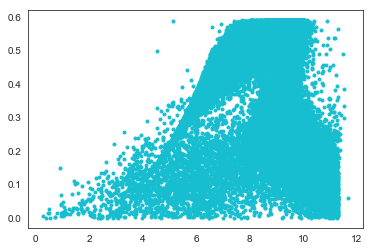

In [141]:
plt.plot(C_p_Lambda_R80711_df.Lambda,C_p_Lambda_R80711_df.C_p, 'C9.')

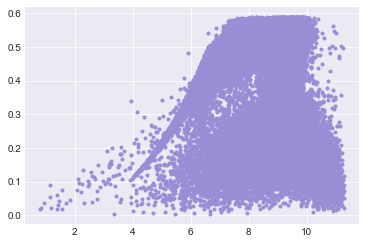

In [200]:
C_p_Lambda_R80711_df_mean = C_p_Lambda_R80711_df.rolling(2).mean()
plt.plot(C_p_Lambda_R80711_df_mean.Lambda,C_p_Lambda_R80711_df_mean.C_p, 'C9.')

In [47]:
Basic_Data_drop_Sort.Rs_avg.max()*math.pi*D/60 # which is just higher than the max tip speed shown in the manual (73.4)

73.93423721607222

In [75]:
C_p_Lambda_R80736_df.mode()

,C_p,Lambda
0,0.33201,10.539653


In [63]:
C_p_Lambda_R80736_df[C_p_Lambda_R80736_df.Lambda == 11.7827572028382]

,C_p,Lambda
63460,0.019767,11.782757


In [78]:
display(Basic_Data_drop_Sort_R80736.mode()) # mode shows us that the most common wind speed is 5.35 while the most common rotor speed is 9.23
display(Basic_Data_drop_Sort_R80736.describe()) #However the mean value states that the average wind speed is 6.25 with 12.97 for the Rotor speed implying
Basic_Data_drop_Sort_R80736.Rs_avg.mean()*math.pi*D/60/Basic_Data_drop_Sort_R80736.Ws_avg.mean() # a mean lambda using those values is 8.904
Basic_Data_drop_Sort_R80736.Rs_avg.mode()*math.pi*D/60/Basic_Data_drop_Sort_R80736.Ws_avg.mode() # and a modal Lambda of 7.407
# We see the actual modal value for Lambda and the actual average value to be 10.540 and 9.070 respectively.  

,Wind_turbine_name,Date_time,Wa_avg,Ws_avg,P_avg,Rs_avg
0,R80736,2013-03-31 01:00:00,216.80,5.35,77.160004,9.229999
1,NaN,2013-03-31 01:10:00,217.42,NaN,NaN,NaN
2,NaN,2013-03-31 01:20:00,NaN,NaN,NaN,NaN
3,NaN,2013-03-31 01:30:00,NaN,NaN,NaN,NaN
4,NaN,2013-03-31 01:40:00,NaN,NaN,NaN,NaN
5,NaN,2013-03-31 01:50:00,NaN,NaN,NaN,NaN
6,NaN,2014-03-30 01:00:00,NaN,NaN,NaN,NaN
7,NaN,2014-03-30 01:10:00,NaN,NaN,NaN,NaN
8,NaN,2014-03-30 01:20:00,NaN,NaN,NaN,NaN
9,NaN,2014-03-30 01:30:00,NaN,NaN,NaN,NaN


,Wa_avg,Ws_avg,P_avg,Rs_avg
count,160701.000000,160701.000000,160701.000000,160701.000000
mean,181.948988,6.253675,433.987274,12.970301
std,93.167842,1.914772,439.919249,2.950856
min,0.000000,3.510000,0.010000,0.410000
25%,118.520000,4.930000,118.330000,10.330000
50%,200.100010,5.850000,276.109990,12.780000
75%,245.929990,7.040000,591.140010,15.830000
max,360.000000,20.570000,2049.919900,17.219999


0    7.407308
dtype: float64

In [70]:
9.66*math.pi*D/60/Basic_Data_drop_Sort_R80736.loc[63461].Ws_avg
# The Highest Lambda value is due to a slightly

11.65036724093516

Text(0.5, 0.98, 'Density plots for Power produced (kW) by Wind turbine')

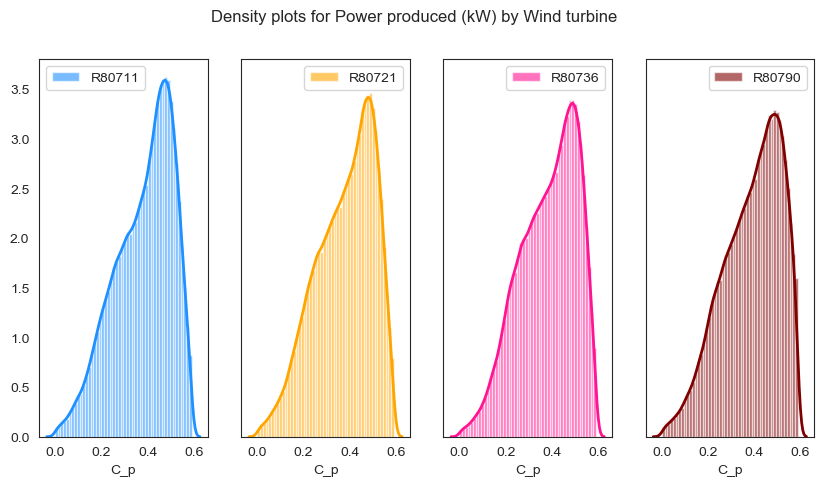

In [36]:
x1 = Power_Conversion_R80711[Power_Conversion_R80711 < 0.59] # 0.59 C_p is the theoretical limit Betz limit
x2 = Power_Conversion_R80721[Power_Conversion_R80721 < 0.59]
x3 = Power_Conversion_R80736[Power_Conversion_R80736 < 0.59]
x4 = Power_Conversion_R80790[Power_Conversion_R80790 < 0.59]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
fig, axes = plt.subplots(1, 4, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x1, color="dodgerblue", label="R80711",ax=axes[0], axlabel='C_p',**kwargs)
axes[0].legend()
sns.distplot(x2, color="orange", label="R80721",ax=axes[1], axlabel='C_p', **kwargs)
axes[1].legend()
sns.distplot(x3, color="deeppink", label="R80736",ax=axes[2], axlabel='C_p', **kwargs)
axes[2].legend()
sns.distplot(x4, color="maroon", label="R80790",ax=axes[3], axlabel='C_p', **kwargs)
axes[3].legend();
plt.suptitle('Density plots for Power produced (kW) by Wind turbine')

Text(0.5, 0.98, 'Density plots for Power produced (kW) by Wind turbine')

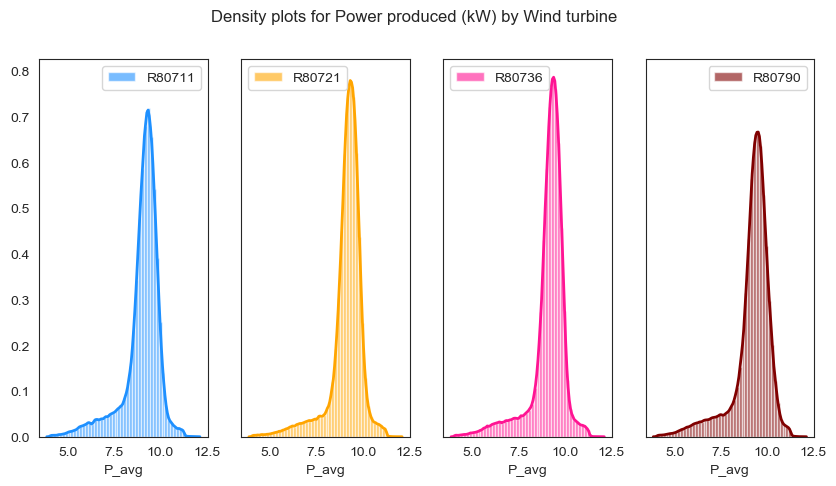

In [64]:
x1 = Lambda_R80711[4<Lambda_R80711]
x1 = x1[x1<12]
x2 = Lambda_R80721[4<Lambda_R80721]
x2 = x2[x2<12]
x3 = Lambda_R80736[4<Lambda_R80736]
x3 = x3[x3<12]
x4 = Lambda_R80790[4<Lambda_R80790]
x4 = x4[x4<12]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
fig, axes = plt.subplots(1, 4, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x1, color="dodgerblue", label="R80711",ax=axes[0], axlabel='Lambda',**kwargs)
axes[0].legend()
sns.distplot(x2, color="orange", label="R80721",ax=axes[1], axlabel='Lambda', **kwargs)
axes[1].legend()
sns.distplot(x3, color="deeppink", label="R80736",ax=axes[2], axlabel='Lambda', **kwargs)
axes[2].legend()
sns.distplot(x4, color="maroon", label="R80790",ax=axes[3], axlabel='Lambda', **kwargs)
axes[3].legend();
plt.suptitle('Density plots for the Tip Speed Ratio by Wind Turbine')

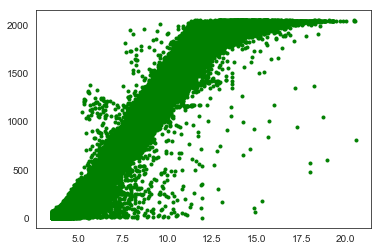

In [86]:
Basic_Data_drop_Sort_P_avg_Ws_avg = Basic_Data_drop_Sort[['P_avg', 'Ws_avg']]
display(plt.plot(Basic_Data_drop_Sort_P_avg_Ws_avg.Ws_avg, Basic_Data_drop_Sort_P_avg_Ws_avg.P_avg, 'g.'))
# Should use hourly makes the shape clearer

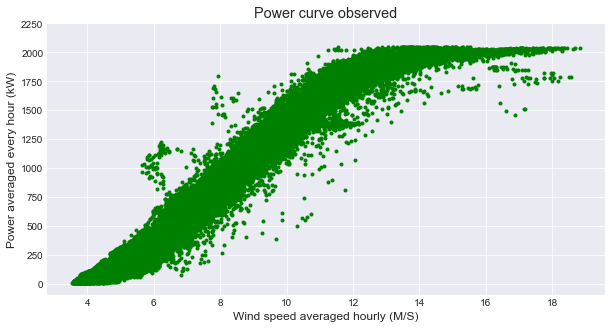

In [186]:
Basic_Data_drop_Sort_P_avg_Ws_avg_mean = Basic_Data_drop_Sort_P_avg_Ws_avg.rolling(6).mean() # Hourly
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(Basic_Data_drop_Sort_P_avg_Ws_avg_mean.Ws_avg, Basic_Data_drop_Sort_P_avg_Ws_avg_mean.P_avg, 'g.')
plt.ylabel('Power averaged every hour (kW)')
plt.xlabel('Wind speed averaged hourly (M/S)')
plt.title('Power curve observed')
plt.yticks(np.arange(0, 2500, step=250))
plt.savefig('Power_curve_observed_rolling_mean_hourly.pdf')
# include the actual power curve from the specs

In [227]:
print('PLOTS BE HERE!!')

PLOTS BE HERE!!


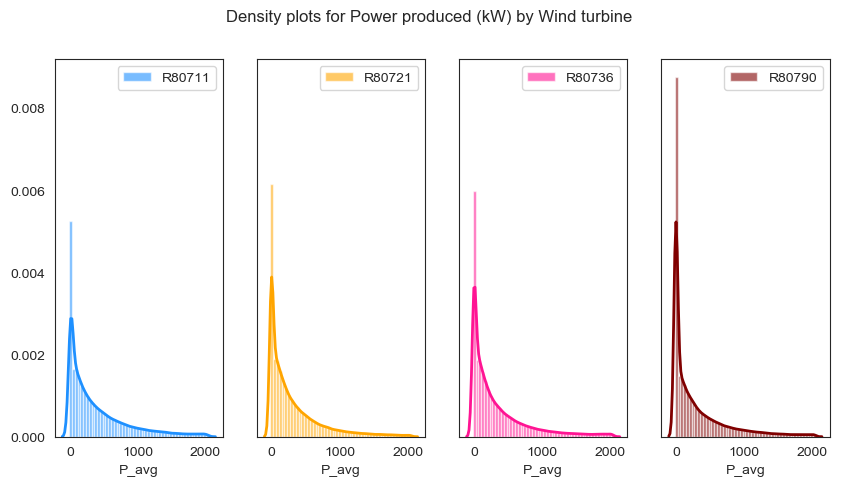

In [202]:
x1 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80711', ['P_avg']]
x2 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80721', ['P_avg']]
x3 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80736', ['P_avg']]
x4 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80790', ['P_avg']]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
fig, axes = plt.subplots(1, 4, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x1, color="dodgerblue", label="R80711",ax=axes[0], axlabel='P_avg',**kwargs)
axes[0].legend()
sns.distplot(x2, color="orange", label="R80721",ax=axes[1], axlabel='P_avg', **kwargs)
axes[1].legend()
sns.distplot(x3, color="deeppink", label="R80736",ax=axes[2], axlabel='P_avg', **kwargs)
axes[2].legend()
sns.distplot(x4, color="maroon", label="R80790",ax=axes[3], axlabel='P_avg', **kwargs)
axes[3].legend();
plt.suptitle('Density plots for Power produced (kW) by Wind turbine')
plt.savefig('Density plots for Power produced by Wind turbine.pdf')

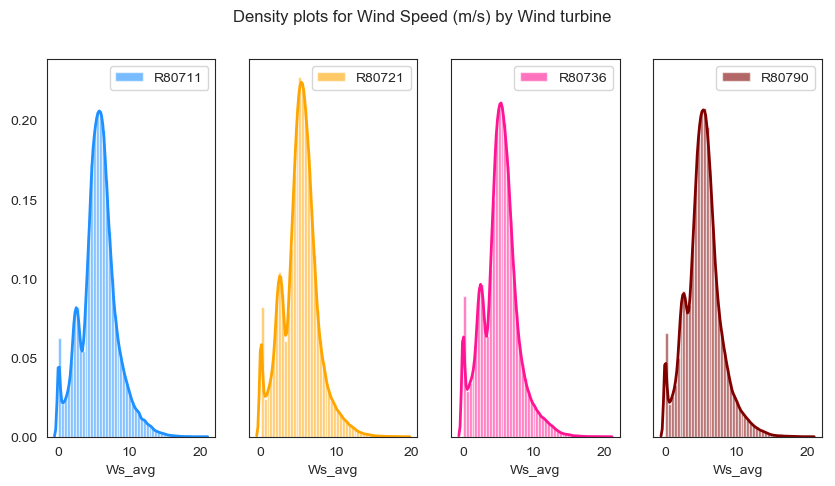

In [199]:
x1 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80711', ['Ws_avg']]
x2 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80721', ['Ws_avg']]
x3 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80736', ['Ws_avg']]
x4 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80790', ['Ws_avg']]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
fig, axes = plt.subplots(1, 4, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x1, color="dodgerblue", label="R80711",ax=axes[0], axlabel='Ws_avg',**kwargs)
axes[0].legend()
sns.distplot(x2, color="orange", label="R80721",ax=axes[1], axlabel='Ws_avg', **kwargs)
axes[1].legend()
sns.distplot(x3, color="deeppink", label="R80736",ax=axes[2], axlabel='Ws_avg', **kwargs)
axes[2].legend()
sns.distplot(x4, color="maroon", label="R80790",ax=axes[3], axlabel='Ws_avg', **kwargs)
axes[3].legend();
plt.suptitle('Density plots for Wind Speed (m/s) by Wind turbine')
plt.savefig('Density plots for Wind Speed by Wind turbine.pdf')

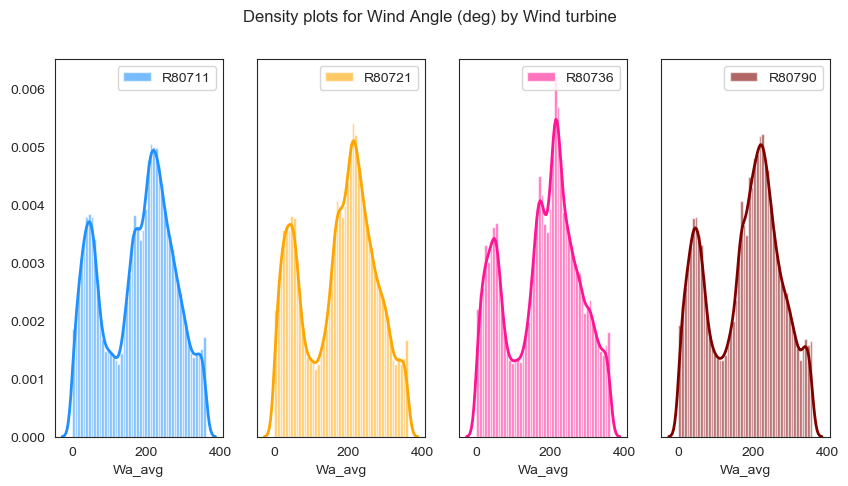

In [201]:
x1 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80711', ['Wa_avg']]
x2 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80721', ['Wa_avg']]
x3 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80736', ['Wa_avg']]
x4 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80790', ['Wa_avg']]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
fig, axes = plt.subplots(1, 4, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x1, color="dodgerblue", label="R80711",ax=axes[0], axlabel='Wa_avg',**kwargs)
axes[0].legend()
sns.distplot(x2, color="orange", label="R80721",ax=axes[1], axlabel='Wa_avg', **kwargs)
axes[1].legend()
sns.distplot(x3, color="deeppink", label="R80736",ax=axes[2], axlabel='Wa_avg', **kwargs)
axes[2].legend()
sns.distplot(x4, color="maroon", label="R80790",ax=axes[3], axlabel='Wa_avg', **kwargs)
axes[3].legend();
plt.suptitle('Density plots for Wind Angle (deg) by Wind turbine')
plt.savefig('Density plots for Wind Angle by Wind turbine.pdf')

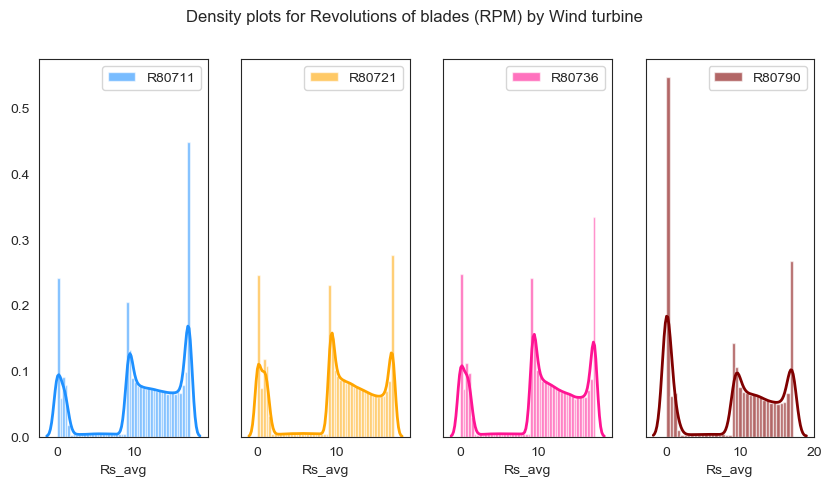

In [203]:
x1 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80711', ['Rs_avg']]
x2 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80721', ['Rs_avg']]
x3 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80736', ['Rs_avg']]
x4 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80790', ['Rs_avg']]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
fig, axes = plt.subplots(1, 4, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x1, color="dodgerblue", label="R80711",ax=axes[0], axlabel='Rs_avg',**kwargs)
axes[0].legend()
sns.distplot(x2, color="orange", label="R80721",ax=axes[1], axlabel='Rs_avg', **kwargs)
axes[1].legend()
sns.distplot(x3, color="deeppink", label="R80736",ax=axes[2], axlabel='Rs_avg', **kwargs)
axes[2].legend()
sns.distplot(x4, color="maroon", label="R80790",ax=axes[3], axlabel='Rs_avg', **kwargs)
axes[3].legend();
plt.suptitle('Density plots for Revolutions of blades (RPM) by Wind turbine')
plt.savefig('Density plots for Revolutions of blades by Wind turbine.pdf')

In [89]:
Basic_Data_drop_R80711['Rs_avg'].autocorr()

0.9681672736323601

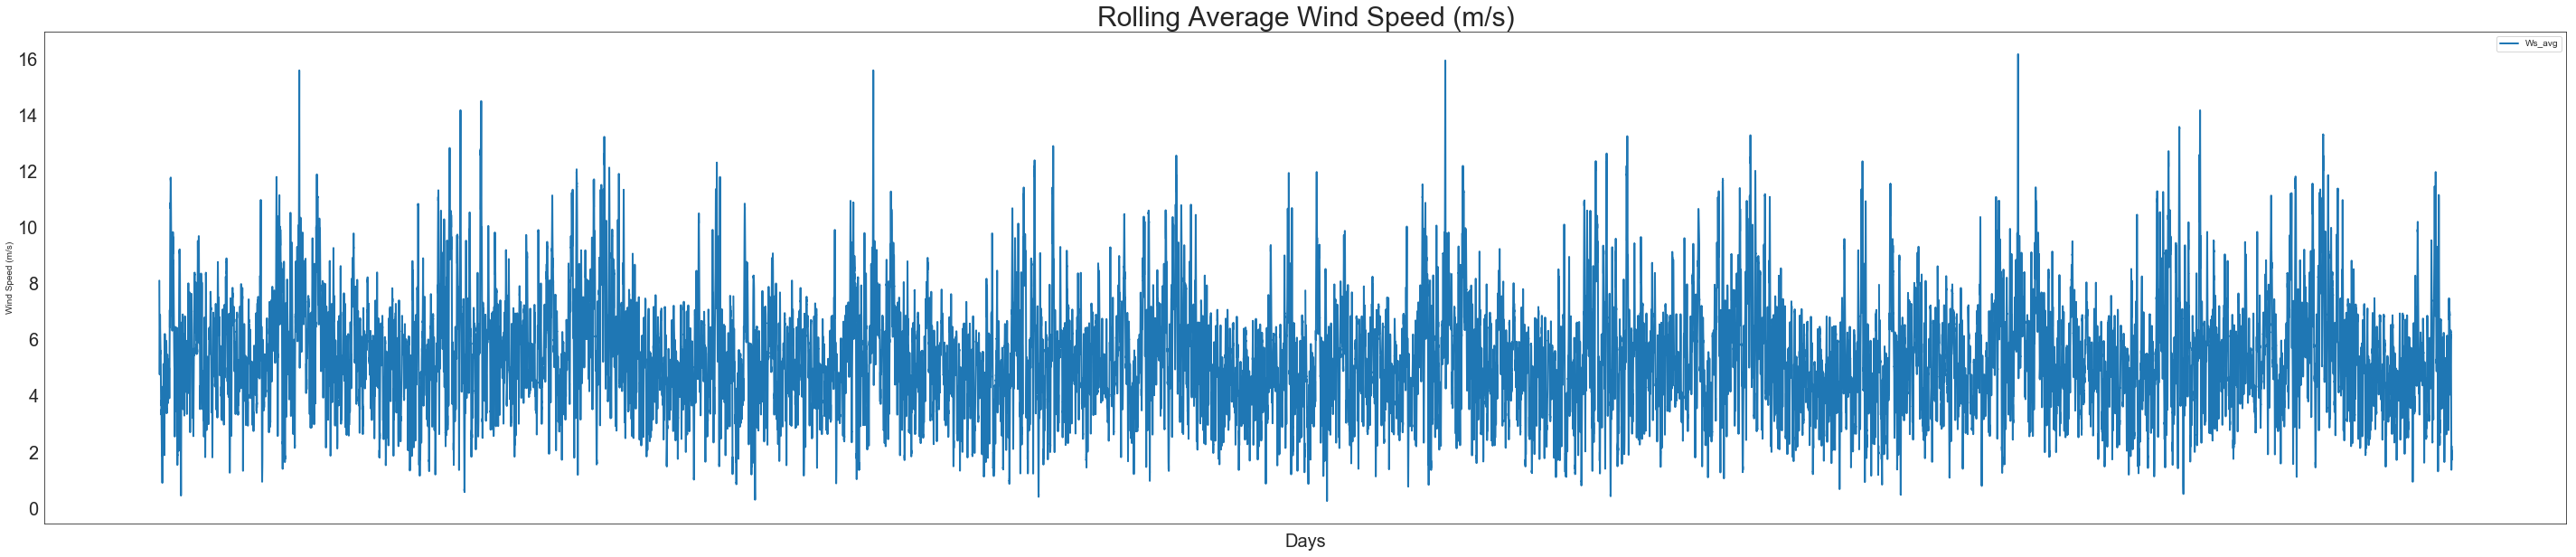

In [219]:
Basic_Data_drop_Group[['Ws_avg']].rolling(144).mean().plot(figsize=(50,10), linewidth=2, fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Wind Speed (m/s)')
plt.title('Rolling Average Wind Speed (m/s)', fontsize = 30)
plt.savefig("Rolling_Average_Wind_Speed_all.pdf");

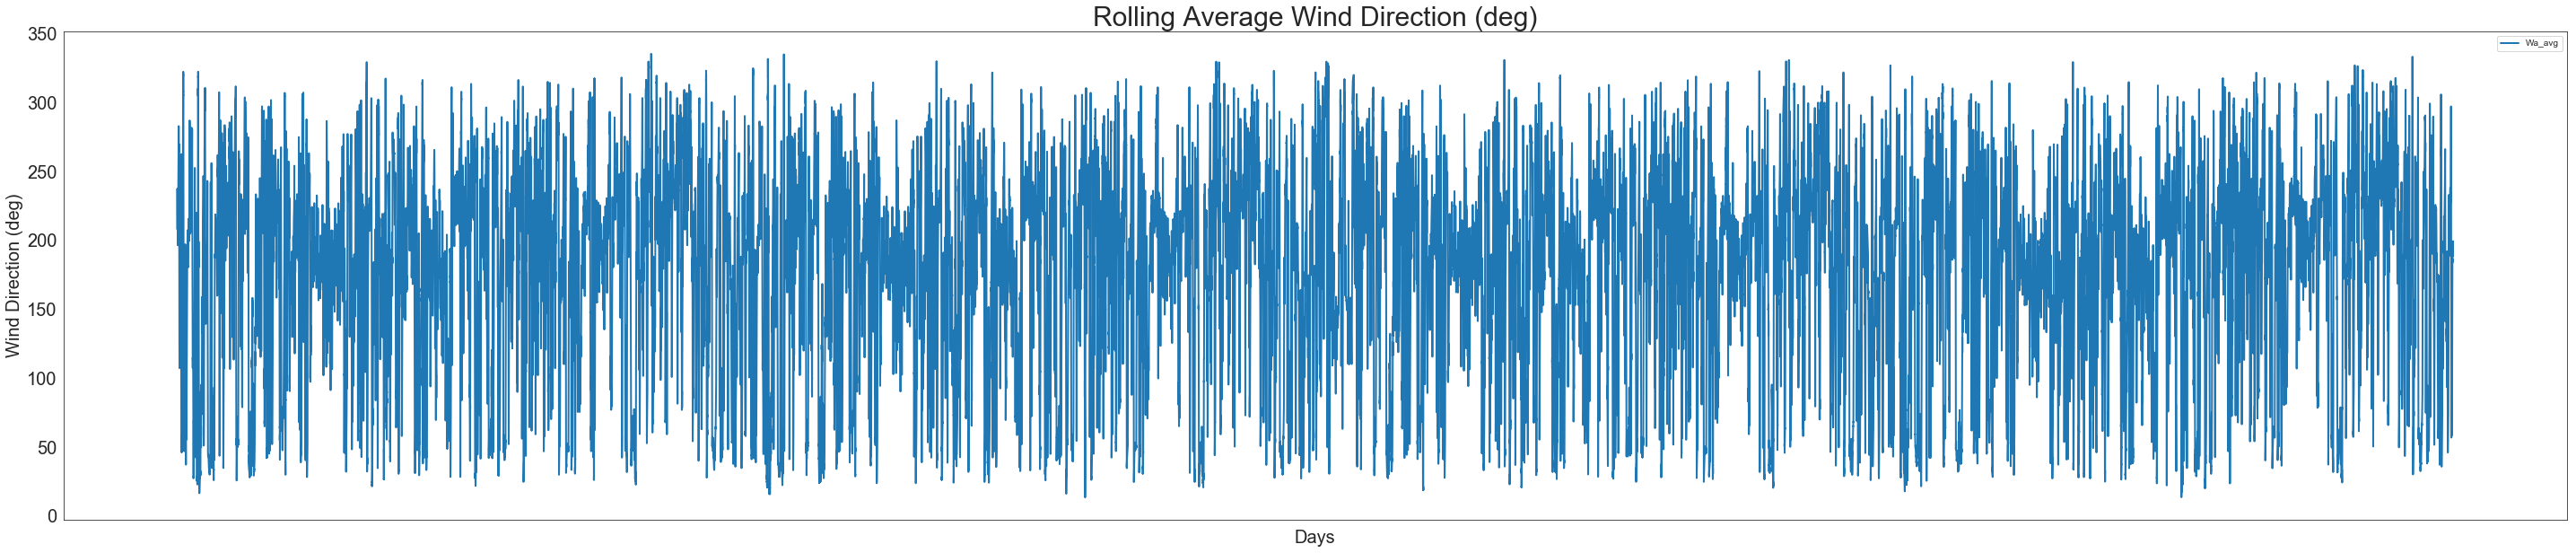

In [217]:
Basic_Data_drop_Group[['Wa_avg']].rolling(144).mean().plot(figsize=(50,10), linewidth=2, fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Wind Direction (deg)', fontsize=20)
plt.title('Rolling Average Wind Direction (deg)', fontsize = 30)
plt.savefig("Rolling_Average_Wind_Direction_all.pdf");

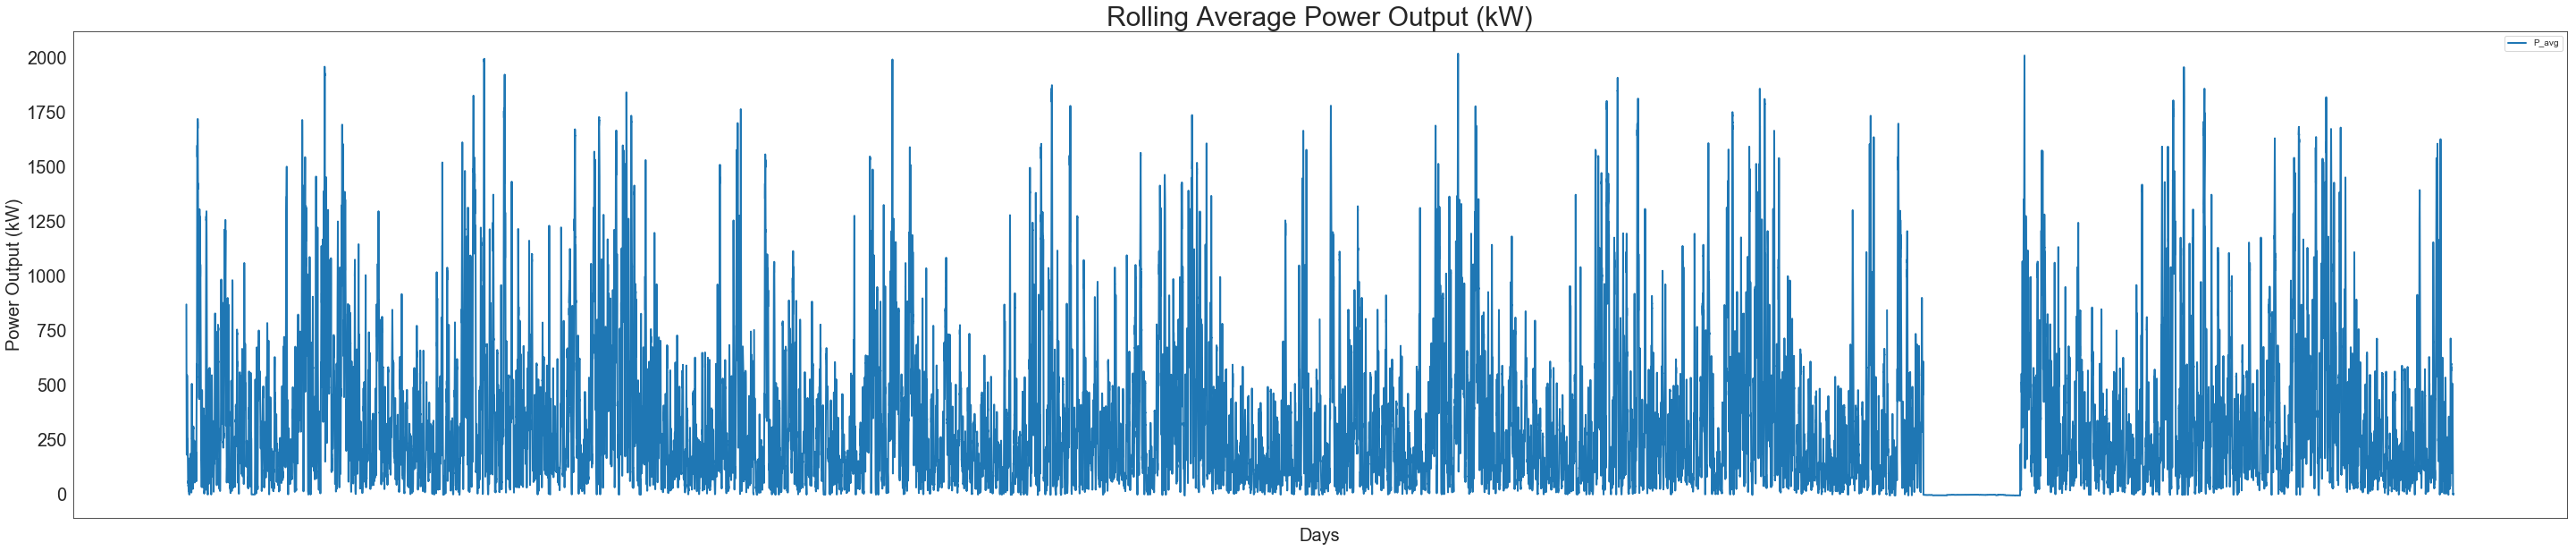

In [216]:
Basic_Data_drop_Group[['P_avg']].rolling(144).mean().plot(figsize=(50,10), linewidth=2, fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Power Output (kW)', fontsize=20)
plt.title('Rolling Average Power Output (kW)', fontsize =30)
plt.savefig("Rolling_Average_Power_Output_all.pdf");

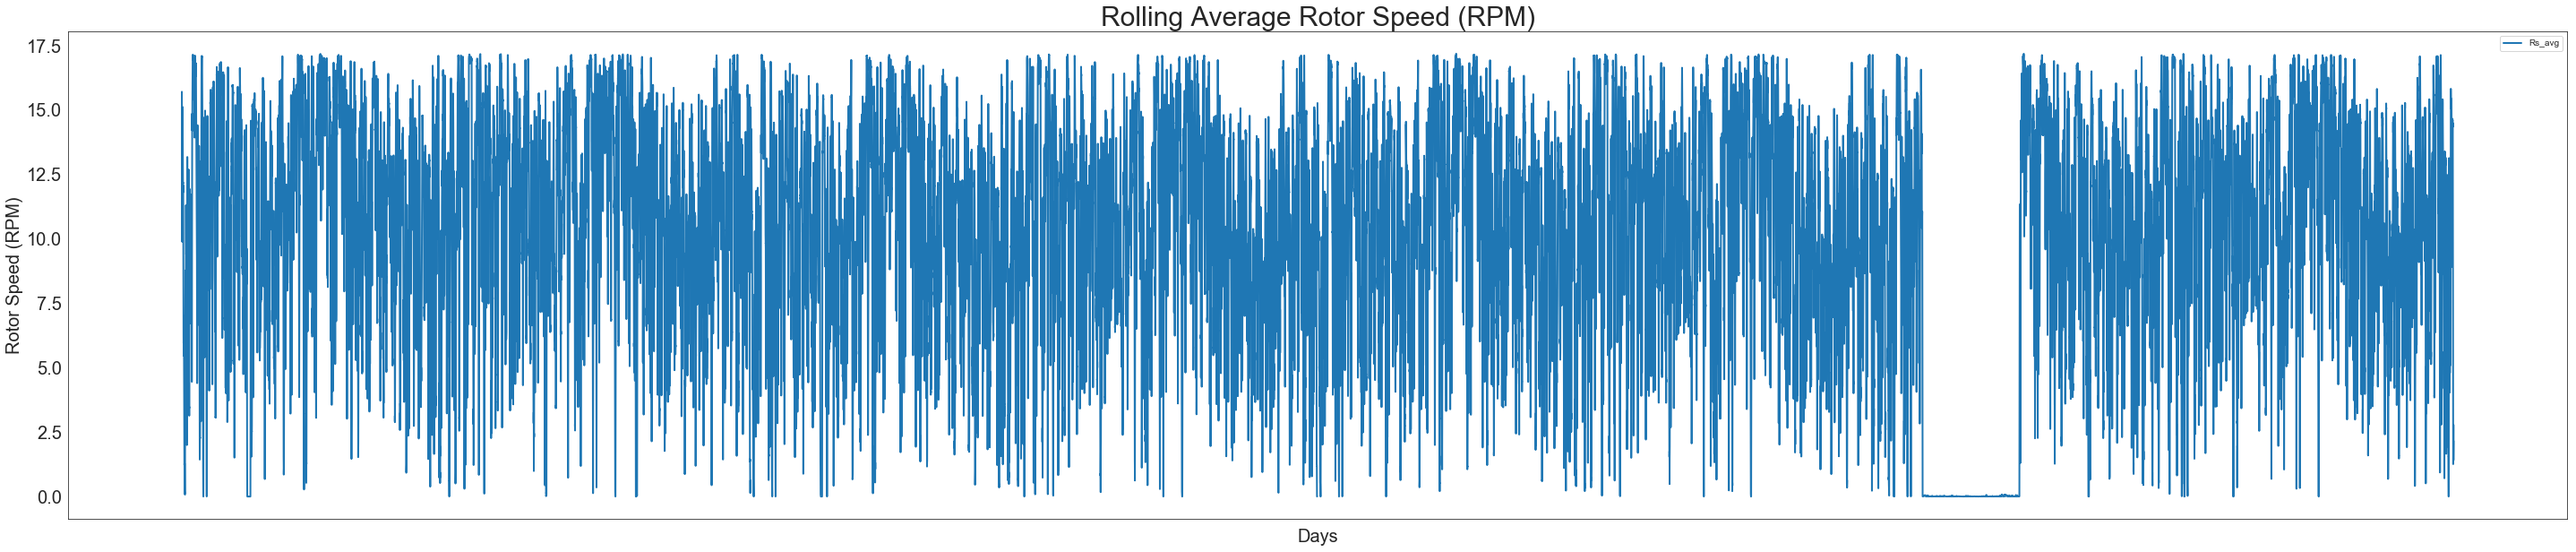

In [215]:
Basic_Data_drop_Group[['Rs_avg']].rolling(144).mean().plot(figsize=(50,10), linewidth=2, fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Rotor Speed (RPM)', fontsize=20)
plt.title('Rolling Average Rotor Speed (RPM)', fontsize = 30)
plt.savefig("Rolling_Average_Rotor_Speed_all.pdf");